# ARC Reaction Demo using YAML files

Here we load our species objects from YAML files.

Note that no electronic structure job needs to be spawned. Of course, users can load only some of the species (or TSs) from YAML files and let ARC calculate the rest.

YAML files are generated automatically by <a href='http://reactionmechanismgenerator.github.io/RMG-Py/users/arkane/input.html#option-3-automatically-parse-yaml-files'>Arkane</a>, which means that ARC generates them as well. Look for them in the respective species / TS folder. These files compile the required QM information from all relevant jobs, so it's convinient to re-use the same species in a new ARC project w/o recalculating it (so saving computatinal resources). Also, this makes sharing species information much easier.

### imports

In [1]:
import rmgpy
from rmgpy.molecule.molecule import *
from rmgpy.species import Species
from arc.species import ARCSpecies
from arc.reaction import ARCReaction
from IPython.display import display
import arc
import matplotlib.pyplot as plt
%matplotlib notebook

Using Theano backend.


### Here we define ARCSpecies using YAML files

In [2]:
# Define empty lists for convinience:
arc_species_list = list()
arc_rxn_list = list()

"""
Arguments for ARCSpecies:
------------------------
label (``str``)
is_ts (True/False, default is False)
rmg_species (an RMG `Species` object)
mol (an RMG `Molecule` object)
xyz (an xyz guess)
multiplicity (``int``, trivial value, 1 or 2, automatically determined)
charge (``int``, default: 0)
smiles (SMILES structure)
adjlist (RMG Adjacency List structure)
bond_corrections (BAC dictionary for Arkane)
generate_thermo (True/False, default is True)
yml_path (path to the YAML file)
ts_methods (a list with TS guess methods, default is in settings.py)

Note: A TS ARCSpecies object does not have to be created (unless the user would like to explicitly set arguments),
      it will be automatically created per ARCReaction object if not already defined.
"""

arc_species_list.append(ARCSpecies(label='ethanol', yml_path='yml/ethanol.yml'))
arc_species_list.append(ARCSpecies(label='OH', yml_path='yml/OH.yml'))
arc_species_list.append(ARCSpecies(label='o_ethanol_rad', yml_path='yml/o_ethanol_rad.yml'))
arc_species_list.append(ARCSpecies(label='H2O', yml_path='yml/H2O.yml'))

arc_species_list.append(ARCSpecies(label='TS', is_ts=True, yml_path='yml/ethanol + OH = o_ethanol_rad + H2O.yml'))

"""
Arguments for ARCReaction:
-------------------------
label (``str``) should be in the format 'reactant1 + reactant2(optional) <=> product1 + product2(optional)'
reactants (A list of labels corresponding to previously defined ARCSpecies objects)
products (A list of labels corresponding to previously defined ARCSpecies objects)
ts_label (A label corresponding to an ARCSpecies object)
rmg_reaction (An RMG `Reaction` object)
ts_methods (a list with TS guess methods, default is in settings.py, passed to the TS ARCSpecies object)
ts_xyz_guess (a list of xyz guesses)
multiplicity (trivial values automatically determined from reactants/products multiplicities)
charge (automatically determined from reactants)
"""

arc_rxn_list.append(ARCReaction(label='ethanol + OH <=> o_ethanol_rad + H2O', ts_label='TS', ts_methods=[]))

for spc in arc_species_list:
    if not spc.is_ts:
        display(spc.mol)

### Run ARC:

ARC execution initiated on Wed Feb 13 21:46:02 2019

###############################################################
#                                                             #
#                 Automatic Rate Calculator                   #
#                            ARC                              #
#                                                             #
#   Version: 0.1                                              #
#                                                             #
###############################################################

Starting project rxn_tst13

Using the following user input: {'molpro': 'rmg', u'ssh': True, 'qchem': 'pharos', 'gaussian': 'c3ddb'}









Using default level b97-d3/6-311+g(d,p) for refined conformer searches (after filtering via force fields)
Using default level b3lyp/6-311+g(d,p) for TS guesses comparison of different methods
Using default level wb97xd/6-311++g(d,p) for geometry optimizations
Using default level wb97xd/6-311+

Considering species: OH


Considering species: o_ethanol_rad


Considering species: H2O


Considering transition state: TS



Loading RMG's families...
Loading thermodynamics group database from /home/alongd/Code/RMG-database/input/thermo/groups...
Loading transport group database from /home/alongd/Code/RMG-database/input/transport/groups...
Loading frequencies group database from /home/alongd/Code/RMG-database/input/statmech/groups...
Loading Platts additivity group database from /home/alongd/Code/RMG-database/input/solvation/groups...



Considering reaction: ethanol + OH <=> o_ethanol_rad + H2O
(identified as belonging to RMG family H_Abstraction, which is its own reverse)


Setting multiplicity of reaction ethanol + OH <=> o_ethanol_rad + H2O to 2


Loading the RMG database...
Loading thermodynamics library from BurkeH2O2.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from DFT_QCI_thermo.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from Klippenstein_Glarborg2016.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from primaryThermoLibrary.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from primaryNS.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from NitrogenCurran.py in /home/alongd/Code/RMG-database/input/thermo/libraries...
Loading thermodynamics library from NOx2018.py in /home/alongd/Code/RMG-database/

Loading kinetics library C3 from /home/alongd/Code/RMG-database/input/kinetics/libraries/C3/reactions.py...
Loading kinetics library c-C5H5_CH3_Sharma from /home/alongd/Code/RMG-database/input/kinetics/libraries/c-C5H5_CH3_Sharma/reactions.py...
Loading kinetics library GRI-Mech3.0 from /home/alongd/Code/RMG-database/input/kinetics/libraries/GRI-Mech3.0/reactions.py...
Loading kinetics library GRI-Mech3.0-N from /home/alongd/Code/RMG-database/input/kinetics/libraries/GRI-Mech3.0-N/reactions.py...
Loading kinetics library C2H4+O_Klipp2017 from /home/alongd/Code/RMG-database/input/kinetics/libraries/C2H4+O_Klipp2017/reactions.py...
Loading kinetics library primarySulfurLibrary from /home/alongd/Code/RMG-database/input/kinetics/libraries/primarySulfurLibrary/reactions.py...
Loading kinetics library biCPD_H_shift from /home/alongd/Code/RMG-database/input/kinetics/libraries/biCPD_H_shift/reactions.py...
Loading kinetics library N-S_interactions from /home/alongd/Code/RMG-database/input/kine

Loading kinetics library Dooley/methylformate_2 from /home/alongd/Code/RMG-database/input/kinetics/libraries/Dooley/methylformate_2/reactions.py...
Loading kinetics library Sulfur/Thial_Hydrolysis from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/Thial_Hydrolysis/reactions.py...
Loading kinetics library Sulfur/GlarborgH2S from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/GlarborgH2S/reactions.py...
Loading kinetics library Sulfur/Sendt from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/Sendt/reactions.py...
Loading kinetics library Sulfur/HSSH_1bar from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/HSSH_1bar/reactions.py...
Loading kinetics library Sulfur/TP_Song from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/TP_Song/reactions.py...
Loading kinetics library Sulfur/GlarborgNS from /home/alongd/Code/RMG-database/input/kinetics/libraries/Sulfur/GlarborgNS/reactions.py...
Loading kinetics library Sul



Loading species OH...
Assigned a frequency scale factor of 0.984 for model chemistry ccsd(t)-f12/cc-pvtz-f12
Loading statistical mechanics parameters for OH from .yml file...
Saving statistical mechanics parameters for OH...
Saving thermo for OH...



Thermodynamics for OH:
  Enthalpy of formation (298 K)   =     6.653 kcal/mol
  Entropy of formation (298 K)    =    42.580 cal/(mol*K)
   =========== =========== =========== =========== ===========
   Temperature Heat cap.   Enthalpy    Entropy     Free energy
   (K)         (cal/mol*K) (kcal/mol)  (cal/mol*K) (kcal/mol)
   =========== =========== =========== =========== ===========
           300       6.954       6.667      42.627      -6.122
           400       6.946       7.361      44.626     -10.489
           500       6.952       8.056      46.176     -15.032
           600       6.978       8.753      47.446     -19.715
           800       7.094      10.158      49.467     -29.415
          1000       7.273      11.595      

<IPython.core.display.Javascript object>


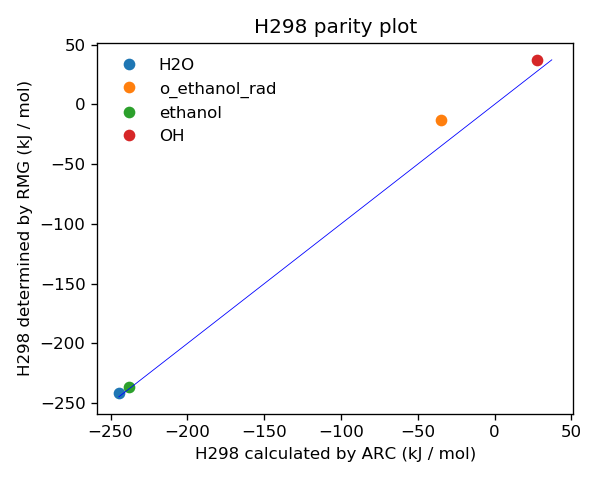

<IPython.core.display.Javascript object>


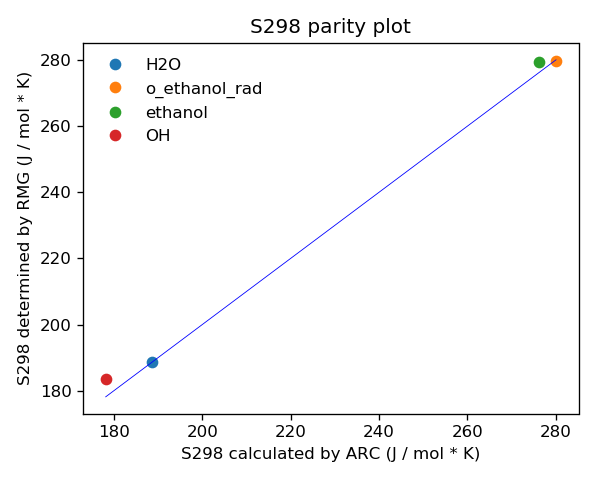


Sources of thermoproperties determined by RMG for the parity plots:
   H2O:           Thermo library: BurkeH2O2
   o_ethanol_rad: Thermo library: DFT_QCI_thermo
   ethanol:       Thermo library: DFT_QCI_thermo
   OH:            Thermo library: BurkeH2O2



<IPython.core.display.Javascript object>


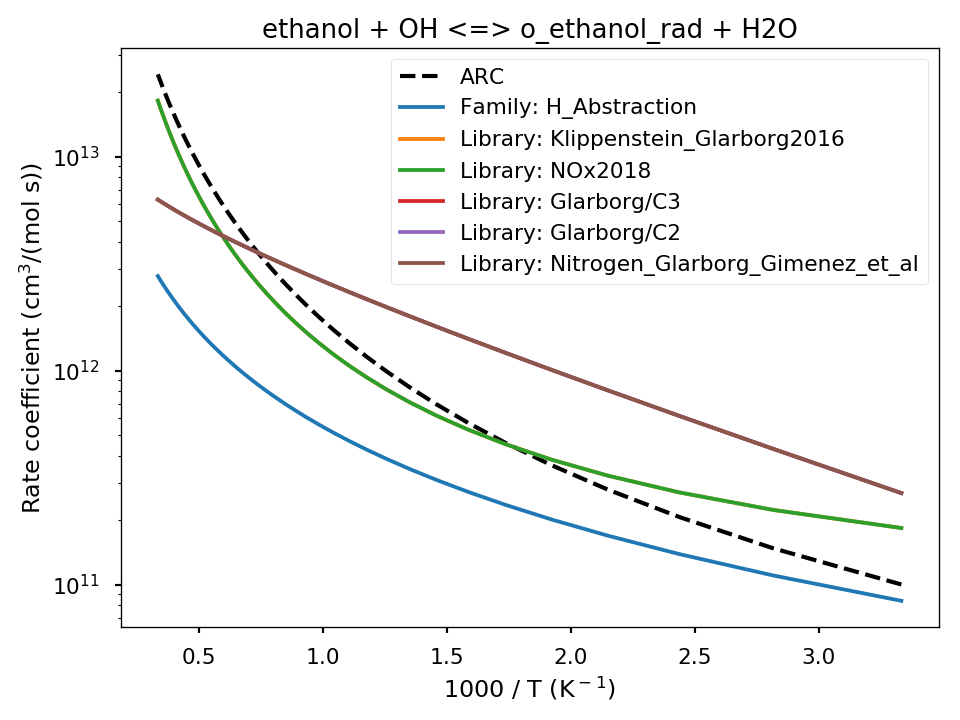




All jobs terminated. Summary for project rxn_tst13:

Species TS converged successfully
Species H2O converged successfully
Species o_ethanol_rad converged successfully
Species ethanol converged successfully
Species OH converged successfully

Total execution time: 00:03:19
ARC execution terminated on Wed Feb 13 21:49:21 2019


In [3]:
"""
Arguments for ARC:
-----------------
project (``str``, the project name. Should be a valid name for a folder)
arc_species_list (A list of ARCSpecies and RMF `Species` objects)
arc_rxn_list (A list of ARCReacrion and RMF `Reaction` objects)
level_of_theory (e.g., `CCSD(T)-F12a/aug-cc-pVTZ//B3LYP/6-311++G(3df,3pd)` or `CBS-QB3`...)
conformer_level
composite_method (either pass the composite method here, or in `level_of_theory`)
opt_level
freq_level (set to `opt_level` if not specified)
sp_level
scan_level
ts_guess_level
fine (True/False, default is True)
generate_conformers (True/False, default is True)
scan_rotors (True/False, default is True)
use_bac (True/False for using bond additivity corrections, default is True)
model_chemistry (should be a valid Arkane "model chemistry")
ess_settings (a software:server dictionary, overrides ARC's servers scanner)
initial_trsh (an initial troubleshooting method for jobs)
t_min (float, minimal T for kineics computations, default: 300)
t_max (float, maximal T for kineics computations, default: 3000)
t_count (int The number of temperature points between t_min and t_max for kinetics computations)
verbose (logging verbosity)
project_directory (A path to the project directory, defaults to ARC/Projects/<project name>)
"""

arc0 = arc.ARC(project='rxn_tst13', arc_species_list=arc_species_list,
              arc_rxn_list=arc_rxn_list, scan_rotors=False, fine=False)
arc0.execute()